# 鸣谢
特别鸣谢一学期以来刘保东老师的辛勤付出与[崔晨学长](cuichen.cc)在Python方面的指导。

# 综述

随着计算机和计算方法的飞速发展，几乎所有学科都走向定量化和精确化，从而产生了一系列计算性的学科分支，如计算物理、计算化学、计算生物学、 计算地质学、计算气象学和计算材料学等， 计算数学中的数值计算方法则是解决“计算”问题的桥梁和工具。我们知道，计算能力是计算工具和计算方法的效率的乘积， 提高计算方法的效率与提高计算机硬件的效率同样重要。 科学计算已用到科学技术和社会生活的各个领域中。

数值计算方法，是一种研究并解决数学问题的数值近似解方法， 是在计算机上使用的解数学问题的方法，简称计算方法。
 
在科学研究和工程技术中都要用到各种计算方法。 例如，在航天航空、地质勘探、汽车制造、桥梁设计、 天气预报和汉字字样设计中都有计算方法的踪影。

计算方法既有数学类课程中理论上的抽象性和严谨性，又有实用性和实验性的技术特征， 计算方法是一门理论性和实践性都很强的学科。 在70年代，大多数学校仅在数学系的计算数学专业和计算机系开设计算方法这门课程。 随着计算机技术的迅速发展和普及， 现在计算方法课程几乎已成为所有理工科学生的必修课程。

计算方法的计算对象是微积分，线性代数，常微分方程中的数学问题。 内容包括：插值和拟合、数值微分和数值积分、求解线性方程组的直接法和迭代法、 计算矩阵特征值和特征向量和常微分方程数值解等问题。

# 本实验报告的一些说明

本实验使用了Python的Jupyter-Notebook编写，采用Donald Knuth提出的**文学编程**（*literature programming*）的编程方法，将Python语言与Markdown语言有机结合，整个实验报告既可阅读又可被计算机执行。同时，本ipynb文件将以同名py文件保存在实验文件夹里。

对于实验中可能使用到的一些必要的Python库，在下方进行了说明，同时，本代码很好的利用了IPython一些特性，对于公式、结果作了良好的展示。

In [3]:
# 导入用到的Python包
import numpy as np
import sympy as sp
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import leastsq
from IPython.display import display, Math

In [4]:
# 辅助函数，用于数据可视化
def abline(ax, x, y, slope):
    x_vals = np.array(ax.get_xlim())
    y_vals = y + slope * (x_vals - x)
    ax.plot(x_vals, y_vals, '--', c='green', linewidth=1)

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

In [5]:
# 初始化全局变量
sp.init_printing()
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 第1章

## 题目 1


根据以下方法构造算法和MATLAB程序，以便精确计算所有情况下的二次方程的根，包括$|b| \approx \sqrt{b^2 - 4ac}$的情况。

设$a \neq 0, b^2 - 4ac > 0$，且有方程$ax^2 + bx + c = 0$，则通过如下二次根公式可解出方程的根：

\begin{equation}
x_1=\frac{-b+\sqrt{b^2-4ac}}{2a}  \quad \quad x_2=\frac{-b-\sqrt{b^2-4ac}}{2a}
\label{eq1}
\tag{1}
\end{equation}

通过将分子有理化，可以等价变换成下列公式

\begin{equation}
x_1=\frac{-2c}{b+\sqrt{b^2-4ac}} \quad \quad x_2=\frac{-2c}{b-\sqrt{b^2-4ac}}
\label{eq2}
\tag{2}
\end{equation}

当$|b| \approx \sqrt{b^2 - 4ac}$，必须小心处理，以避免其值过小而引起巨量消失（catastrophic cancellation）而带来精度损失。

- 当$b > 0$的时候应使用公式(\ref{eq2})计算$x_1$，应使用公式(\ref{eq1})计算$x_2$。
- 当$b < 0$的时候应使用公式(\ref{eq1})计算$x_1$，应使用公式(\ref{eq2})计算$x_2$。

### 实验代码

In [6]:
def solve_quad(a, b, c):
    delta = b * b - 4 * a * c
    if delta < 0:
        return None 
    elif delta == 0:
        return [-b / (2 * a)]
    elif b > 0:
        return [-2 * c / (b + np.sqrt(delta)),
                (-b - np.sqrt(delta)) / (2 * a)]
    elif b < 0:
        return [(-b + np.sqrt(delta)) / (2 * a),
                -2 * c / (b - np.sqrt(delta))]

def disp_solve_quad(a, b, c):
    res = solve_quad(a, b, c)
    x = sp.Symbol('x')
    f = a * x * x + b * x + c
    if res is None:
        display(Math('方程 %s = 0 无解.' % sp.latex(f)))
    elif len(res) == 1:
        display(Math('方程 %s = 0 有一解: x = %.12f.' % (sp.latex(f), res[0])))
    else:
        display(Math('方程 %s = 0 有两解: x_0 = %.12f, x_1 = %.12f.' % (sp.latex(f), res[0], res[1])))

def bmatrix(a):
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

使用以下方程对该程序进行测试：

In [7]:
disp_solve_quad(1, 0, 1)
disp_solve_quad(1, 2, 1)
disp_solve_quad(1, 2.001, 1)
disp_solve_quad(1, -1000.001, 1)
disp_solve_quad(1, -1000.0001, 1)
disp_solve_quad(1, -1000.00001, 1)
disp_solve_quad(1, -1000.000001, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 题目 2

对下列3个差分方程计算出前十个数值近似值。在每种情况下引入一个小的初始误差。如果没有初始误差，则每个差分方程将生成序列$\left\{1/2^n\right\}_{n=1}^\infty$，构造误差表和误差图。

(a) $r_0=0.994,r_n=\frac{1}{2}r_{n-1},n=1,2,\cdots$<br />
(b) $p_0=1,p_1=0.497,p_n=\frac{3}{2}p_{n-1}-\frac{1}{2}p_{n-2},n=2,3,\cdots$<br />
(c) $q_0=1,q_1=0.497,q_n=\frac{5}{2}q_{n-1}-q_{n-2},n=2,3,\cdots$<br />

### 实验代码

生成数列$s_n = \left\{1/2^n\right\}_{n=1}^\infty$：

In [8]:
n = 10
s = [1]
for i in range(1, n):
    s.append(0.5 * s[i - 1])
s = np.array(s)
print(s)

[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


生成数列$r_n$：

In [9]:
r = [0.994]
for i in range(1, n):
    r.append(0.5 * r[i - 1])
r = np.array(r)
r

array([0.994     , 0.497     , 0.2485    , 0.12425   , 0.062125  ,
       0.0310625 , 0.01553125, 0.00776562, 0.00388281, 0.00194141])

生成数列$p_n$：

In [10]:
p = [1, 0.497]
for i in range(2, n):
    p.append(1.5 * p[i - 1] - 0.5 * p[i - 2])
p = np.array(p)
p

array([ 1.        ,  0.497     ,  0.2455    ,  0.11975   ,  0.056875  ,
        0.0254375 ,  0.00971875,  0.00185938, -0.00207031, -0.00403516])

生成数列$q_n$：

In [11]:
q = [1, 0.497]
for i in range(2, n):
    q.append(2.5 * q[i - 1] - q[i - 2])
q = np.array(q)
q

array([ 1.        ,  0.497     ,  0.2425    ,  0.10925   ,  0.030625  ,
       -0.0326875 , -0.11234375, -0.24817188, -0.50808594, -1.02204297])

数列$s_n, r_n, p_n, q_n$的前10项：

In [13]:
pd.options.display.float_format = '{:,.12f}'.format
df1 = pd.DataFrame(np.array([s, r, p, q]).T, columns=['$s_n$', '$r_n$', '$p_n$', '$q_n$'])
df1

,$s_n$,$r_n$,$p_n$,$q_n$
0,1.000000000000,0.994000000000,1.000000000000,1.000000000000
1,0.500000000000,0.497000000000,0.497000000000,0.497000000000
2,0.250000000000,0.248500000000,0.245500000000,0.242500000000
3,0.125000000000,0.124250000000,0.119750000000,0.109250000000
4,0.062500000000,0.062125000000,0.056875000000,0.030625000000
5,0.031250000000,0.031062500000,0.025437500000,-0.032687500000
6,0.015625000000,0.015531250000,0.009718750000,-0.112343750000
7,0.007812500000,0.007765625000,0.001859375000,-0.248171875000
8,0.003906250000,0.003882812500,-0.002070312500,-0.508085937500
9,0.001953125000,0.001941406250,-0.004035156250,-1.022042968750


绘制每个数列的前10项的折线图：

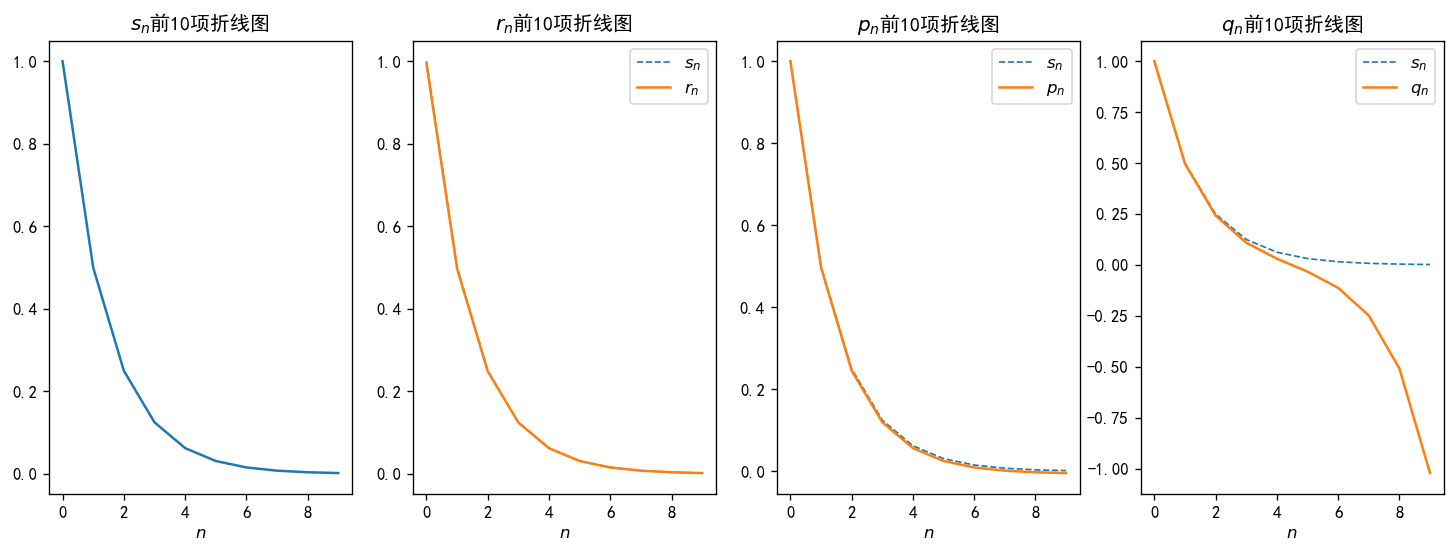

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('$s_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s)

plt.subplot(1, 4, 2)
plt.title('$r_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(r, label='$r_n$')
plt.legend(loc='upper right')

plt.subplot(1, 4, 3)
plt.title('$p_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(p, label='$p_n$')
plt.legend(loc='upper right')

plt.subplot(1, 4, 4)
plt.title('$q_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(q, label='$q_n$')
plt.legend(loc='upper right')

plt.savefig('fig1.png', bbox_inches='tight')

数列$s_n$与$r_n, p_n, q_n$之差的前10项：

In [12]:
err_r, err_p, err_q = s - r, s - p, s - q
df2 = pd.DataFrame(np.array([err_r, err_p, err_q]).transpose(), columns=['$s_n - r_n$', '$s_n - p_n$', '$s_n - q_n$'])
df2

,$s_n - r_n$,$s_n - p_n$,$s_n - q_n$
0,0.006000000000,0.000000000000,0.000000000000
1,0.003000000000,0.003000000000,0.003000000000
2,0.001500000000,0.004500000000,0.007500000000
3,0.000750000000,0.005250000000,0.015750000000
4,0.000375000000,0.005625000000,0.031875000000
5,0.000187500000,0.005812500000,0.063937500000
6,0.000093750000,0.005906250000,0.127968750000
7,0.000046875000,0.005953125000,0.255984375000
8,0.000023437500,0.005976562500,0.511992187500
9,0.000011718750,0.005988281250,1.023996093750


绘制每个数列的前10项的误差折线图：

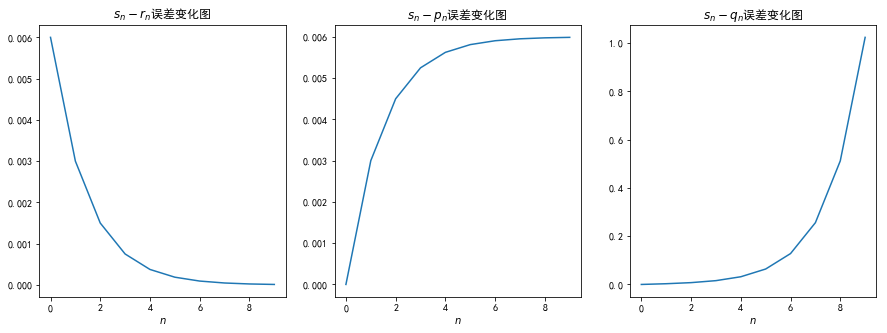

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('$s_n - r_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_r)
plt.subplot(1, 3, 2)
plt.title('$s_n - p_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_p)
plt.subplot(1, 3, 3)
plt.title('$s_n - q_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_q)
plt.savefig('fig2.pdf', bbox_inches='tight')

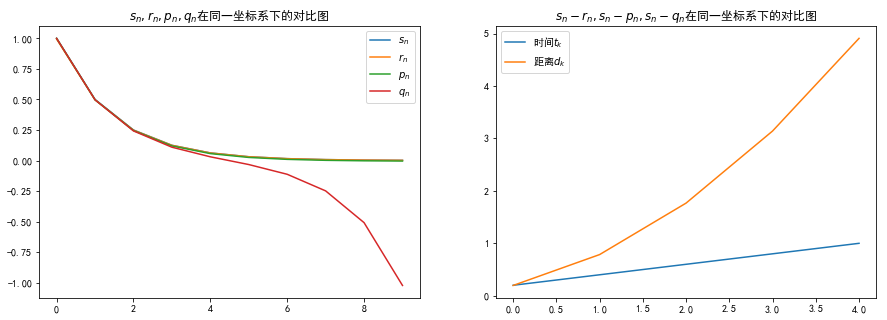

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df1.plot(ax=axes[0], title='$s_n, r_n, p_n, q_n$在同一坐标系下的对比图')
df2.plot(ax=axes[1], title='$s_n - r_n, s_n - p_n, s_n - q_n$在同一坐标系下的对比图')
plt.savefig('fig3.pdf', bbox_inches='tight')

# 第2章

## Problem 1

利用牛顿法求解方程
$$\frac{1}{2}+\frac{1}{4}x^2-x\sin x-\frac{1}{2}\cos2x=0$$
分别取$x_0=\frac{\pi}{2},5\pi,10\pi$,使精度不超过$10^{-5}$,比较初值对计算结果的影响。

### 理论分析

### 实验

首先使用Python的`sympy`包对函数$f(x) = \frac{x^{2}}{4} - x \sin{\left (x \right )} - \frac{1}{2} \cos{\left (2 x \right )} + \frac{1}{2}$进行求导。

In [5]:
x = sp.Symbol('x')
f = sp.Rational(1, 2) + sp.Rational(1, 4) * x * x - x * sp.sin(x) - sp.Rational(1, 2) * sp.cos(2 * x)
df = sp.diff(f)
# 将符号转换为可求值的函数
f_eval = sp.lambdify(x, f)
df_eval = sp.lambdify(x, df)
display(Math('f(x) = %s 的导函数为 f^\prime(x) = %s.' % (sp.latex(f), sp.latex(df))))

<IPython.core.display.Math object>

然后我们做出$f(x) = \frac{x^{2}}{4} - x \sin{\left (x \right )} - \frac{1}{2} \cos{\left (2 x \right )} + \frac{1}{2}$及其导函数的图像进行观察。

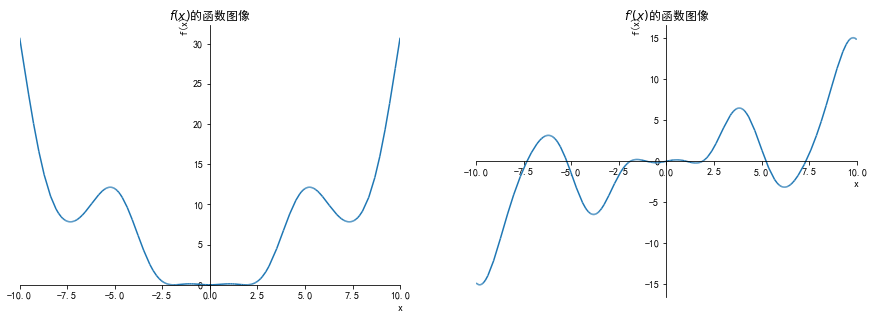

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
p1 = sp.plot(f, title='$f(x)$的函数图像', show=False)
p2 = sp.plot(df, title='$f^\prime(x)$的函数图像', show=False)
move_sympyplot_to_axes(p1, axes[0])
move_sympyplot_to_axes(p2, axes[1])
plt.savefig('fig4.pdf', bbox_inches='tight')

观察图像可知，函数零点在$(-2, 2)$这段区间上，因此我们将其放大进行观察：

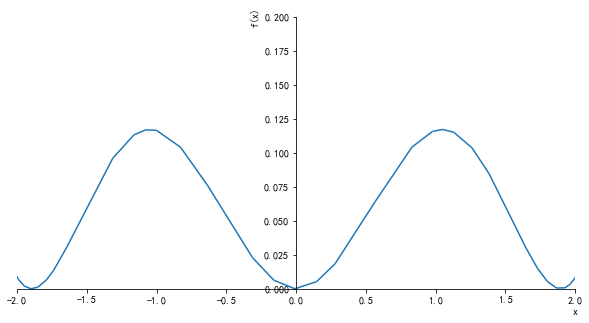

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
p = sp.plot(f, xlim=[-2, 2], ylim=[0, 0.2], show=False)
move_sympyplot_to_axes(p, ax)
plt.savefig('fig5.pdf', bbox_inches='tight')

然后使用牛顿法求解方程，分别取$x_0=\frac{\pi}{2},5\pi,10\pi$：

In [14]:
def newton(f, df, x0, eps, max_iter, ax=None, px=None):
    x = x0
    if ax is not None:
        ax.axhline(y=0, color='red', linestyle='-', linewidth=1)
        ax.plot(px, f(px), linewidth=2)
    for n in range(max_iter):
        fx = f(x)
        if ax is not None:
            ax.scatter(x, fx, c='red', marker='.')
        if abs(fx) < eps:
            print('在%d次迭代后找到解.' % n)
            if ax is not None:
                ax.scatter(x, fx, c='red')
            return x
        dfx = df(x)
        if ax is not None:
            abline(ax, x, fx, dfx)
        if dfx == 0:
            print('导数值为0，无法找到解.')
            return None
        x = x - fx / dfx
        if ax is not None:
            ax.axvline(x=x, linestyle='--', c='orange', linewidth=1)
    print('超过最大迭代次数，无法找到解.')
    return None

在6次迭代后找到解.


<IPython.core.display.Math object>

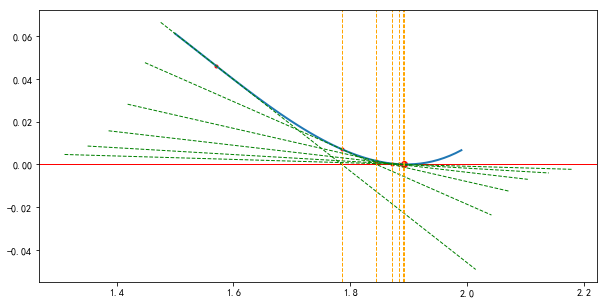

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(1.5, 2.0, 0.01)
display(Math('找到零点x = %s.' % newton(f_eval, df_eval, np.pi / 2, 1e-5, 100, ax, px)))
plt.savefig('fig6.pdf', bbox_inches='tight')

在10次迭代后找到解.


<IPython.core.display.Math object>

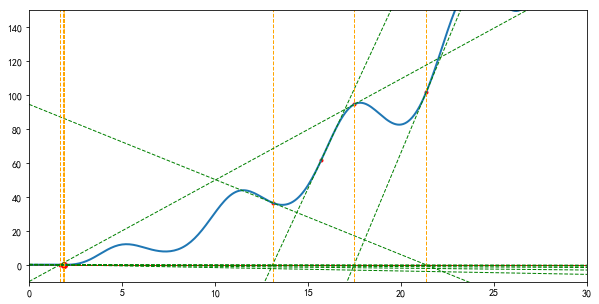

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(0, 30, 0.1)
plt.xlim(0, 30)
plt.ylim(-10, 150)
display(Math('找到零点x = %s.' % newton(f_eval, df_eval, 5 * np.pi, 1e-5, 100, ax, px)))
plt.savefig('fig7.pdf', bbox_inches='tight')

In [21]:
display(Math('找到零点x = %s.' % newton(f_eval, df_eval, 10 * np.pi, 1e-5, 20000)))

在10313次迭代后找到解.


<IPython.core.display.Math object>

注：由于当$x_0 = 10\pi$时迭代次数过多，计算量过大，所以难以将计算过程进行可视化，仅计算其结果，不进行可视化。

#### 解与迭代次数的关系

下面对解和迭代次数的关系进行探究（以初值$x_0 = \frac{\pi}{2} 为例$）：

In [103]:
def _newton(f, df, x0, max_iter):
    x = x0
    for n in range(max_iter):
        fx = f(x)
        dfx = df(x)
        x = x - fx / dfx
    return x

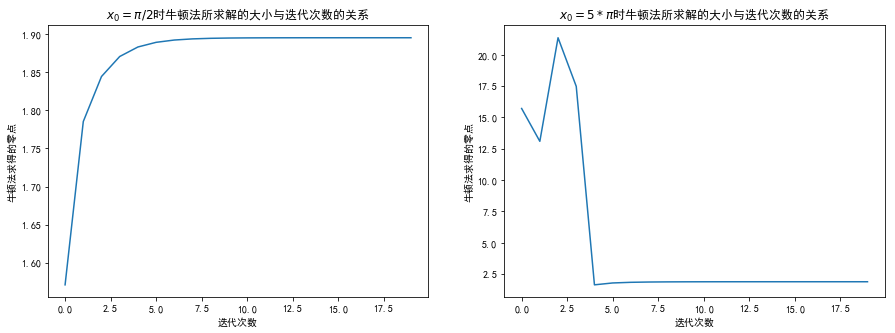

In [105]:
num_iter = np.arange(20)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('迭代次数')
plt.ylabel('牛顿法求得的零点')
plt.title('$x_0 = \pi/2$时牛顿法所求解的大小与迭代次数的关系')
plt.plot(num_iter, np.array([_newton(f_eval, df_eval, np.pi / 2, i) for i in num_iter]))

plt.subplot(1, 2, 2)
plt.xlabel('迭代次数')
plt.ylabel('牛顿法求得的零点')
plt.title('$x_0 = 5 * \pi$时牛顿法所求解的大小与迭代次数的关系')
plt.plot(num_iter, np.array([_newton(f_eval, df_eval, 5 * np.pi, i) for i in num_iter]))
plt.savefig('fig8.pdf', bbox_inches='tight')

## Problem 2

已知$$f\left(x\right) = 5x - e^x$$
在$\left(0,1\right)$之间有一个实根，试分别用二分法、牛顿法、割线法、错位法设计相应的计算格式，并编程求解。

### 理论分析

### 实验

首先使用Python的`sympy`包对函数$f\left(x\right) = 5x - e^x$进行求导。

In [8]:
x = sp.Symbol('x')
f = 5 * x - sp.exp(x)
df = sp.diff(f)
f_eval = sp.lambdify(x, f)
df_eval = sp.lambdify(x, df)
display(Math('f(x) = %s 的导函数为 f^\prime(x) = %s.' % (sp.latex(f), sp.latex(df))))

<IPython.core.display.Math object>

然后我们做出$f\left(x\right) = 5x - e^x$及其导函数的图像进行观察。

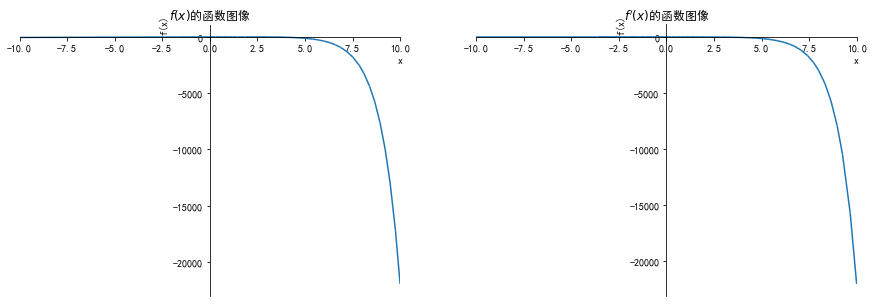

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
p1 = sp.plot(f, title='$f(x)$的函数图像', show=False)
p2 = sp.plot(df, title='$f^\prime(x)$的函数图像', show=False)
move_sympyplot_to_axes(p1, axes[0])
move_sympyplot_to_axes(p2, axes[1])
plt.savefig('fig_1.pdf', bbox_inches='tight')

#### 二分法

In [10]:
def bisection(f, a, b, max_iter, ax=None, px=None):
    if ax is not None:
        ax.axhline(y=0, color='red', linestyle='-', linewidth=1)
        ax.axvline(x=a, linestyle='--', c='green', linewidth=1)
        ax.axvline(x=b, linestyle='--', c='green', linewidth=1)
        ax.plot(px, f(px), linewidth=2)
    if f(a) * f(b) >= 0:
        print("二分法失败.")
        return None
    for _ in range(max_iter):
        c = (a + b) / 2
        if ax is not None:
            ax.axvline(x=c, linestyle='--', c='green', linewidth=1)
        fc = f(c)
        if f(a) * fc < 0:
            b = c
        elif f(b) * fc < 0:
            a = c
        elif fc == 0:
            print("找到准确的解.")
            return c
        else:
            print("二分法失败.")
            return None
    if ax is not None:
        ax.scatter((a + b) / 2, 0, c='red')
    return (a + b) / 2

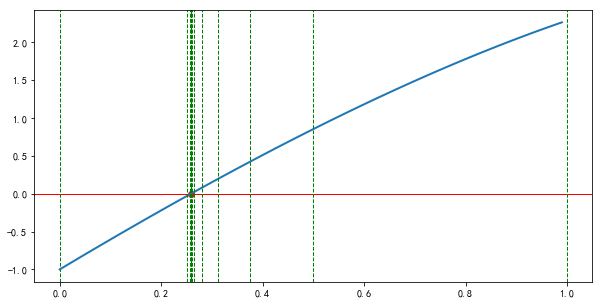

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(0, 1, 0.01)
bisection(f_eval, 0, 1, 100, ax, px)
plt.savefig('fig9.pdf', bbox_inches='tight')

#### 牛顿法

在4次迭代后找到解.


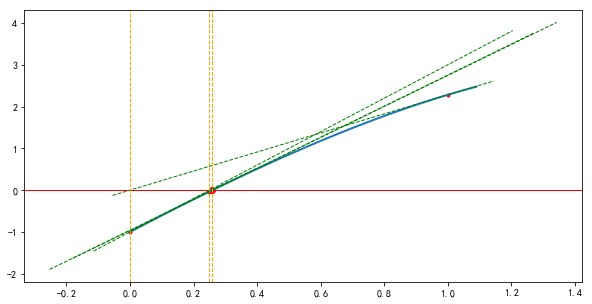

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(0, 1.1, 0.01)
# plt.title('计算$%s = 0$牛顿法的过程示意图' % sp.latex(f))
newton(f_eval, df_eval, 1, 1e-5, 100, ax, px)

#### 割线法

In [17]:
def secant(f, a, b, max_iter, ax=None, px=None):
    if ax is not None:
        ax.axhline(y=0, color='red', linestyle='-', linewidth=1)
        ax.axvline(x=a, linestyle='--', c='green', linewidth=1)
        ax.axvline(x=b, linestyle='--', c='green', linewidth=1)
        ax.plot(px, f(px), linewidth=2)
    if f(a) * f(b) >= 0:
        print("割线法失败.")
        return None
    for _ in range(max_iter):
        fa, fb = f(a), f(b)
        c = a - fa * (b - a) / (fb - fa)
        if ax is not None:
            ax.plot([a, b], [fa, fb], c='orange', linestyle='--', linewidth=1)
            ax.axvline(x=c, linestyle='--', c='green', linewidth=1)
        fc = f(c)
        if fa * fc < 0:
            b = c
        elif fb * fc < 0:
            a = c
        elif fc == 0:
            print("找到准确的解.")
            return c
        else:
            print("割线法失败.")
            return None
    if ax is not None:
        ax.scatter(a - f(a) * (b - a) / (f(b) - f(a)), 0, c='red')
    return a - f(a) * (b - a) / (f(b) - f(a))

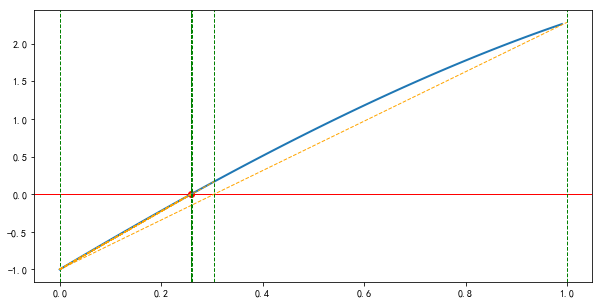

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(0, 1, 0.01)
# plt.title('计算$%s = 0$割线法的过程示意图' % sp.latex(f))
secant(f_eval, 0, 1, 100, ax, px)

#### 错位法

In [20]:
def regula(f, a, b, max_iter, ax=None, px=None):
    if ax is not None:
        ax.axhline(y=0, color='red', linestyle='-', linewidth=1)
        ax.axvline(x=a, linestyle='--', c='green', linewidth=1)
        ax.axvline(x=b, linestyle='--', c='green', linewidth=1)
        ax.plot(px, f(px), linewidth=2)
    if f(a) * f(b) >= 0:
        print("错位法失败.")
        return None
    for _ in range(max_iter):
        fa, fb = f(a), f(b)
        c = a - fa * (b - a) / (fb - fa)
        if ax is not None:
            ax.plot([a, b], [fa, fb], c='orange', linestyle='--', linewidth=1)
            ax.axvline(x=c, linestyle='--', c='green', linewidth=1)
        fc = f(c)
        if fa * fc < 0:
            b = c
        elif fb * fc < 0:
            a = c
        elif fc == 0:
            print("找到准确的解.")
            return c
        else:
            print("错位法失败.")
            return None
    if ax is not None:
        ax.scatter(a - f(a) * (b - a) / (f(b) - f(a)), 0, c='red')
    return a - f(a) * (b - a) / (f(b) - f(a))

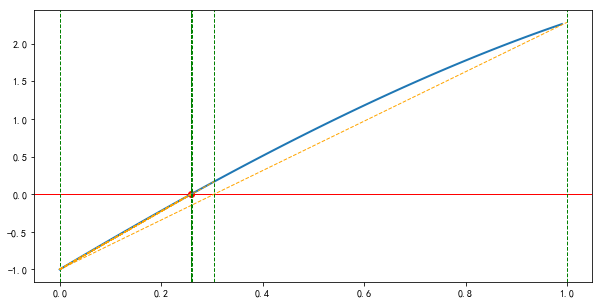

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
px = np.arange(0, 1, 0.01)
# plt.title('计算$%s = 0$错位法的过程示意图' % sp.latex(f))
regula(f_eval, 0, 1, 100, ax, px)

# Chapter 3

## Problem 1

求解线性方程组
\begin{align}
&4x-y+z=7\\
&4x-8y+z=-21\\
&-2x+y+5z=15
\end{align}

1. 使用LU分解求此方程组
2. 分别用Jacobi，Gauss-Seidel方法求解此方程组

### 理论分析

### 实验

In [29]:
A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
B = np.array([7, -21, 15]).reshape(-1, 1)

display(Math('A = %s' % bmatrix(A)))
display(Math('B = %s' % bmatrix(B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### LU分解

In [30]:
def pivot_matrix(A):
    m = A.shape[0]
    I = np.identity(m)
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(A[i, j]))
        if j != row:
            I[[j, row]] = I[[row, j]]
    return I

In [31]:
def lu_decomposition(A):
    n = A.shape[0]
    L = np.zeros((n, n), dtype=float)
    U = np.zeros((n, n), dtype=float)
    A = np.dot(pivot_matrix(A), A)
    for i in range(n):
        for k in range(i, n):
            s = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = A[i][k] - s
        for k in range(i, n):
            if i == k:
                L[i][i] = 1
            else:
                s = sum(L[k][j] * U[j][i] for j in range(i))
                L[k][i] = (A[k][i] - s) / U[i][i]
    return A, L, U

In [32]:
AB = np.column_stack([A, B])
AB, L, U = lu_decomposition(AB)
A = AB[:, :AB.shape[1] - 1]
B = AB[:, AB.shape[1] - 1].reshape(-1, 1)
display(Math('A = %s' % bmatrix(A)))
display(Math('B = %s' % bmatrix(B)))
display(Math('L = %s' % bmatrix(L)))
display(Math('U = %s' % bmatrix(U)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
def backsubL(A, B):
    n = B.size
    X = np.zeros(n, dtype=float)
    X[0] = B[0] / A[0][0]
    for k in range(1, n):
        X[k] = (B[k] - np.dot(A[k, :k], X[:k])) / A[k][k]
    return X

def backsubU(A, B):
    n = B.size
    X = np.zeros(n, dtype=float)
    X[n - 1] = B[n - 1] / A[n - 1][n - 1]
    for k in range(n - 2, -1, -1):
        X[k] = (B[k] - np.dot(A[k, k + 1 : n], X[k + 1 : n])) / A[k][k]
    return X

In [34]:
UX = backsubL(L, B).reshape(-1, 1)
display(Math('UX = %s' % bmatrix(UX)))
X = backsubU(U, UX).reshape(-1, 1)
display(Math('X = %s' % bmatrix(X)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Jacobi方法

In [35]:
def jacobi(A, B, max_iter, x=None, ax=None):
    B = B.reshape(-1)
    if x is None:
        x = np.zeros_like(B)
    show = ax is not None and x.size == 3
    showx = [[] for _ in range(3)]
    D = np.diag(A)
    R = A - np.diagflat(D)
    if show:
        for i in range(len(showx)):
            showx[i].append(x[i])
    for _ in range(max_iter):
        x = (B - np.dot(R, x)) / D
        if show:
            for i in range(len(showx)):
                showx[i].append(x[i])
    if show:
        ax.plot(showx[0], showx[1], showx[2], marker='o')
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$')
        ax.set_zlabel('$x_2$')
        return x, np.array(showx)
    return x

,$x_0$,$x_1$,$x_2$
0,0.000000,0.000000,0.000000
1,1.750000,2.625000,3.000000
2,1.656250,3.875000,3.175000
3,1.925000,3.850000,2.887500
4,1.990625,3.948437,3.000000
5,1.987109,3.995312,3.006563
6,1.997187,3.994375,2.995781
7,1.999648,3.998066,3.000000
8,1.999517,3.999824,3.000246
9,1.999895,3.999789,2.999842


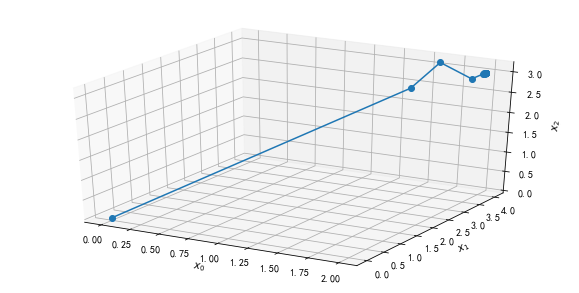

In [37]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
# plt.title('Jacobi迭代的解随迭代次数的变化')
x, showx1 = jacobi(A, B, 30, ax=ax)
columns=['$x_0$', '$x_1$', '$x_2$']
df = pd.DataFrame(showx1.transpose(), columns=columns)
display(df)
plt.savefig('fig13.pdf', bbox_inches='tight')

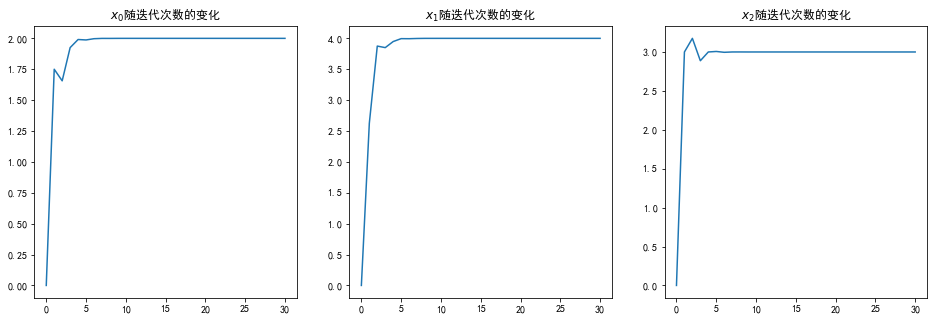

In [38]:
px = np.arange(31)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.title('$x_0$随迭代次数的变化')
plt.plot(px, showx1[0])
plt.subplot(1, 3, 2)
plt.title('$x_1$随迭代次数的变化')
plt.plot(px, showx1[1])
plt.subplot(1, 3, 3)
plt.title('$x_2$随迭代次数的变化')
plt.plot(px, showx1[2])
plt.savefig('fig14.pdf', bbox_inches='tight')

#### Gauss-Seidel方法

In [39]:
def gauss_seidel(A, B, max_iter, x=None, ax=None):
    B = B.reshape(-1)
    if x is None:
        x = np.zeros_like(B)
    show = ax is not None and x.size == 3
    showx = [[] for _ in range(3)]
    if show:
        for i in range(len(showx)):
            showx[i].append(x[i])
    for _ in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (B[i] - s1 - s2) / A[i, i]
        x = x_new
        if show:
            for i in range(len(showx)):
                showx[i].append(x[i])
    if show:
        ax.plot(showx[0], showx[1], showx[2], marker='o')
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$')
        ax.set_zlabel('$x_2$')
        return x, np.array(showx)
    return x

,$x_0$,$x_1$,$x_2$
0,0.000000,0.000000,0.000000
1,1.750000,3.500000,3.000000
2,1.875000,3.937500,2.962500
3,1.993750,3.992188,2.999062
4,1.998281,3.999023,2.999508
5,1.999879,3.999878,2.999976
6,1.999975,3.999985,2.999993
7,1.999998,3.999998,3.000000
8,2.000000,4.000000,3.000000
9,2.000000,4.000000,3.000000


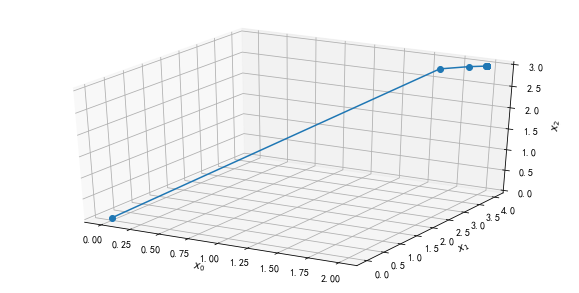

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
# plt.title('Jacobi迭代的解随迭代次数的变化')
x, showx2 = gauss_seidel(A, B, 30, ax=ax)
columns=['$x_0$', '$x_1$', '$x_2$']
df = pd.DataFrame(showx2.transpose(), columns=columns)
display(df)
plt.savefig('fig15.pdf', bbox_inches='tight')

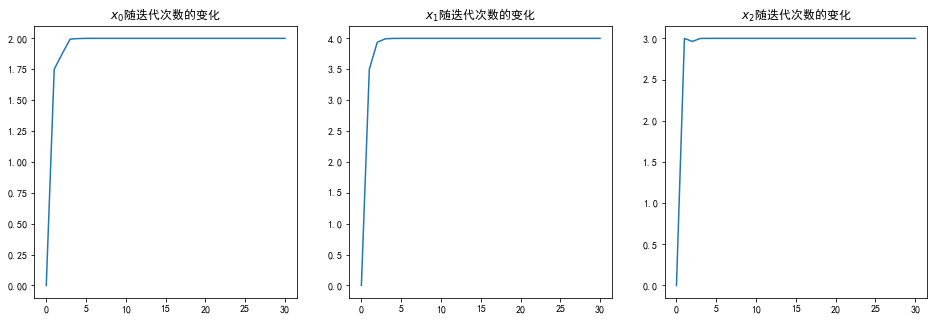

In [41]:
px = np.arange(31)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.title('$x_0$随迭代次数的变化')
plt.plot(px, showx2[0])
plt.subplot(1, 3, 2)
plt.title('$x_1$随迭代次数的变化')
plt.plot(px, showx2[1])
plt.subplot(1, 3, 3)
plt.title('$x_2$随迭代次数的变化')
plt.plot(px, showx2[2])
plt.savefig('fig16.pdf', bbox_inches='tight')

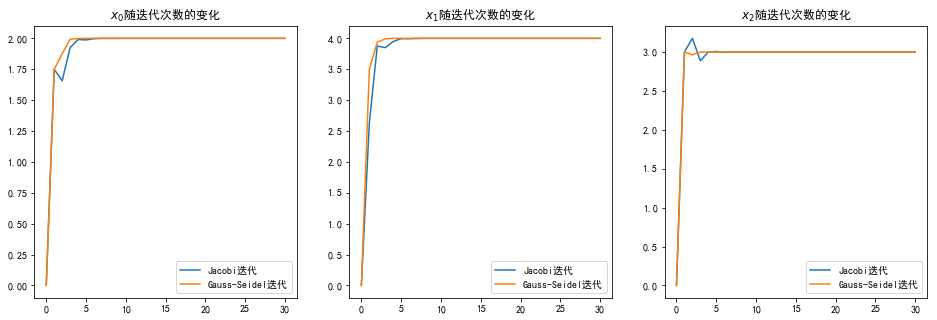

In [42]:
px = np.arange(31)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.title('$x_0$随迭代次数的变化')
plt.plot(px, showx1[0], label='Jacobi迭代')
plt.plot(px, showx2[0], label='Gauss-Seidel迭代')
plt.legend(loc='lower right')
plt.subplot(1, 3, 2)
plt.title('$x_1$随迭代次数的变化')
plt.plot(px, showx1[1], label='Jacobi迭代')
plt.plot(px, showx2[1], label='Gauss-Seidel迭代')
plt.legend(loc='lower right')
plt.subplot(1, 3, 3)
plt.title('$x_2$随迭代次数的变化')
plt.plot(px, showx1[2], label='Jacobi迭代')
plt.plot(px, showx2[2], label='Gauss-Seidel迭代')
plt.legend(loc='lower right')
plt.savefig('fig17.pdf', bbox_inches='tight')

## Problem 2

设有如下三角线性方程组，而且系数矩阵具有严格对角优势：
$$
\begin{matrix}
d_1x_1 &+&c_1x_2 &  & & & & &=&b_1\\
a_1x_1 &+& d_2x_2&+& c_2x_3 & & & &=&b_2\\
& & a_2x_2 &+& d_3x_3 &+& c_3x_4 & &=&b_3\\
& & . & & & &&&.\\
& &  &. & & &&&.\\
& & & &. & &&&.\\
& & & &  & a_{N-1}x_{N-1}&+&d_Nx_N&=&b_N\\
\end{matrix}
$$

1. 设计算法来求解上述方程组。算法必须有效的利用方程的稀疏性。
2. 根据（1）中设计的算法构造一个MATLAB程序，求解下列三角线性方程组。

## 题目 3

利用Gauss-Seidel迭代法求解下列带状方程。


In [46]:
A = 12 * np.identity(50)
for i in range(50):
    if i + 1 < 50:
        A[i][i + 1] = -2
    if i + 2 < 50:
        A[i][i + 2] = 1
    if i - 1 >= 0:
        A[i][i - 1] = -2
    if i - 2 >= 0:
        A[i][i - 2] = 1
B = 5 * np.ones(50).reshape(-1, 1)
display(Math('A = %s' % bmatrix(A)))
display(Math('B = %s' % r"\begin{bmatrix} 5.\\5.\\5.\\...\\5.\\5.\\5.\\ \end{bmatrix}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
x = gauss_seidel(A, B, 30)
display(Math('X = %s' % bmatrix(x)))

<IPython.core.display.Math object>

# 第4章

## 题目1

在区间$[-5,5]$上，生成11个等距插值节点$x_i,i=0,1,2,3,\cdots,10$。在相应的插值节点上计算函数
$$y(x)=\frac{1}{1+x^2}$$
的函数值作为观测值$y(x_i),i=1,2,3,\cdots,10$。

### 题目1.1

利用这11个数据点，生成一个10次拉格朗日插值多项式$P_{10}(x)$,并作出插值函数与原函数的结果对比图

#### 拉格朗日插值多项式

对于给定的$n+1$个点, $n$次拉格朗日插值多项式以此通过这$n+1$个点.

拉格朗日多项式形式如下:
$$P\left(x\right) = \sum_{k=0}^{n}L_{n,k}\left(x\right) f\left(x\right)$$.

其中$L_{n,k}\left(x\right)$为基函数, 满足这样的性质:
$$L_{n,k}\left(x_i\right)=\left\{
	\begin{aligned}
		0, \ i \neq k \\
		1, \ i = k
	\end{aligned}
 \right.$$
 
取$$L_{n,k}\left(x\right) = \prod_{i=0,i \neq k}^{n} \frac{x-x_i}{x_k - x_i}$$.

#### 拉格朗日余项

$f\left(x\right) = P\left(x\right) + R\left(x \right)$, 其中$P\left(x\right)$为$n$次多项式, $$R\left(x\right) = \frac{f^{\left(n+1\right)}\left(\xi\left(x\right)\right)}{\left(n+1\right)!}\prod_{i=0}^{n}\left(x-x_i\right)$$为余项. 用于误差估计.

#### 生成11个数据点

In [44]:
x = np.arange(-5, 6, 1)
y = 1 / (1 + x * x)
for i, (xi, yi) in enumerate(zip(x, y)):
    display(Math("%s: %s" % (i, str((xi, yi)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 代码实现

In [45]:
def lagrange(X, Y):
    w = len(x)
    n = w - 1
    L = np.zeros((w, w), dtype=float)
    for k in range(n + 1):
        V = 1
        for j in range(n + 1):
            if k != j:
                V = np.convolve(V, np.poly(X[j])) / (X[k] - X[j])
        L[k] = V
    C = np.dot(Y, L)
    return C

            10             9            8             7           6
-2.262e-05 x  - 1.864e-19 x + 0.001267 x - 1.108e-17 x - 0.02441 x
          5          4             3          2
 + 1e-16 x + 0.1974 x - 7.284e-17 x - 0.6742 x - 1.448e-16 x + 1


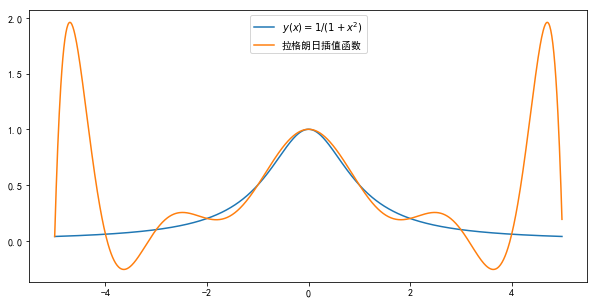

In [47]:
L = lagrange(x, y)
f = np.poly1d(L)
print(f)
xs = np.arange(-5, 5, 0.01)
ys_true = 1 / (1 + xs * xs)
ys_pred = f(xs)
plt.figure(figsize=(10, 5))
plt.plot(xs, ys_true, label='$y(x)=1 / ({1+x^2)}$')
plt.plot(xs, ys_pred, label='拉格朗日插值函数')
plt.legend(loc='upper center')
# plt.title('插值函数与原函数的结果对比图')
plt.savefig('fig18.pdf', bbox_inches='tight')

### 题目1.2

利用此多项式近似计算$$\int_{-5}^{5}\frac{1}{1+x^2}dx \approx \int_{-5}^{5}P_{10}(x)dx$$与解析解比较，分析误差产生的原因。

#### 近似解与解析解可视化比较

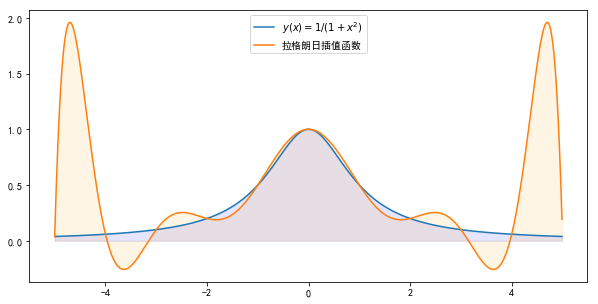

In [49]:
plt.figure(figsize=(10, 5))

plt.plot(xs, ys_true, label='$y(x)=1 / ({1+x^2)}$')
plt.fill_between(xs, ys_true, color = "blue", alpha = 0.1)
plt.plot(xs, ys_pred, label='拉格朗日插值函数')
plt.fill_between(xs, ys_pred, color = "orange", alpha = 0.1)
plt.legend(loc='upper center')
plt.savefig('fig19.pdf', bbox_inches='tight')

#### 解析解结果

In [52]:
x_sym = sp.Symbol('x')
f_sym = 1 / (1 + x_sym * x_sym)
F_sym = sp.integrate(f_sym, x_sym)
F_sym
F_eval = sp.lambdify(x_sym, F_sym)
display(Math("%s = %s = %s" % ("\int_{-5}^{5}{1 / ({1+x^2)}}", "[%s]_{-5}^{5}" % F_sym, F_eval(5) - F_eval(-5))))

<IPython.core.display.Math object>

#### 近似解结果

In [53]:
_L = [l for l in L]
for i, l in enumerate(_L):
    _L[i] = l / (11 - i)
_L.append(0)
_f = np.poly1d(_L)
print("%s \n的积分是\n %s" % (f, _f))
display(Math("积分结果为%s" % (_f(5) - _f(-5))))

            10             9            8             7           6
-2.262e-05 x  - 1.864e-19 x + 0.001267 x - 1.108e-17 x - 0.02441 x
          5          4             3          2
 + 1e-16 x + 0.1974 x - 7.284e-17 x - 0.6742 x - 1.448e-16 x + 1 
的积分是
             11             10             9             8            7
-2.057e-06 x  - 1.864e-20 x  + 0.0001408 x - 1.385e-18 x - 0.003487 x
              6           5             4          3             2
 + 1.667e-17 x + 0.03948 x - 1.821e-17 x - 0.2247 x - 7.241e-17 x + 1 x


<IPython.core.display.Math object>

### 题目1.3

利用${\{(x_i,y(x_i))\}}_{i=0}^{10}$,构造分片线性插值多项式$P(x)$，并利用此分片插值多项式近似计算积分$$\int_{-5}^{5}\frac{1}{1+x^2}dx \approx \int_{-5}^{5}P(x)dx$$与解析解比较，分析误差产生的原因。

#### 近似解与解析解可视化比较

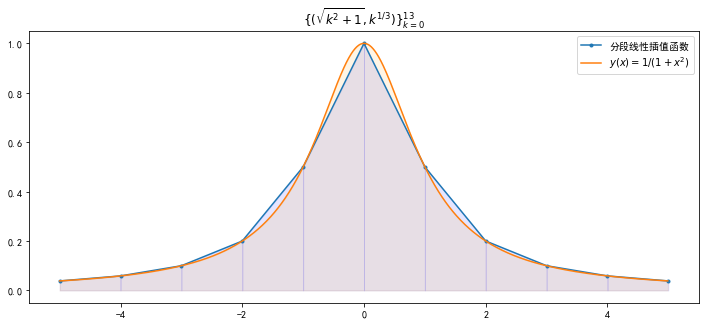

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(x, y, marker='.', label='分段线性插值函数')
plt.title('${\{(\sqrt{k^2+1},k^{1/3})\}}_{k=0}^{13}$')
res = 0
for ki in range(1, len(x)):
    h = x[ki] - x[ki - 1]
    res += h / 2 * (y[ki - 1] + y[ki])
    plt.fill_between([x[ki], x[ki - 1]], [y[ki], y[ki - 1]], color = "blue", alpha = 0.1)
plt.plot(xs, ys_true, label='$y(x)=1 / ({1+x^2)}$')
plt.fill_between(xs, ys_true, color = "orange", alpha = 0.1, linewidth=1)
plt.legend(loc='upper right')
plt.savefig('fig20.pdf', bbox_inches='tight')
res

### 题目1.4

若希望提高积分的计算精度，试提出你自己的建议，并进行实验测试验证。

分片线性插值增加分段数，可以有效的减少误差。Lagrange插值如果分段过多会产生剧烈的龙格震荡现象，误差迅速增高。

#### 拉格朗日插值与分段线性插值在不同分段数的对比

In [51]:
data = []
for n in range(2, 21, 1):
    x = np.linspace(-5., 5., n + 1)
    y = 1 / (1 + x * x)

    L = lagrange(x, y)
    f = np.poly1d(L)

    _L = [l for l in L]
    for i, l in enumerate(_L):
        _L[i] = l / (n + 1 - i)
    _L.append(0)
    _f = np.poly1d(_L)
    res1 = _f(5) - _f(-5)
    
    res2 = 0
    for ki in range(1, len(x)):
        h = x[ki] - x[ki - 1]
        res2 += h / 2 * (y[ki - 1] + y[ki])
    
    data.append((n, res1, res2))
df = pd.DataFrame(data, columns=['分段数', '拉格朗日插值函数结果', '分段线性插值函数结果'])
df

,分段数,拉格朗日插值函数结果,分段线性插值函数结果
0,2,6.794872,5.192308
1,3,2.081448,1.892911
2,4,2.374005,3.285809
3,5,2.307692,2.476923
4,6,3.870449,2.888352
5,7,2.898994,2.665501
6,8,1.500489,2.784489
7,9,2.398618,2.721866
8,10,4.673301,2.756109
9,11,3.244773,2.738522


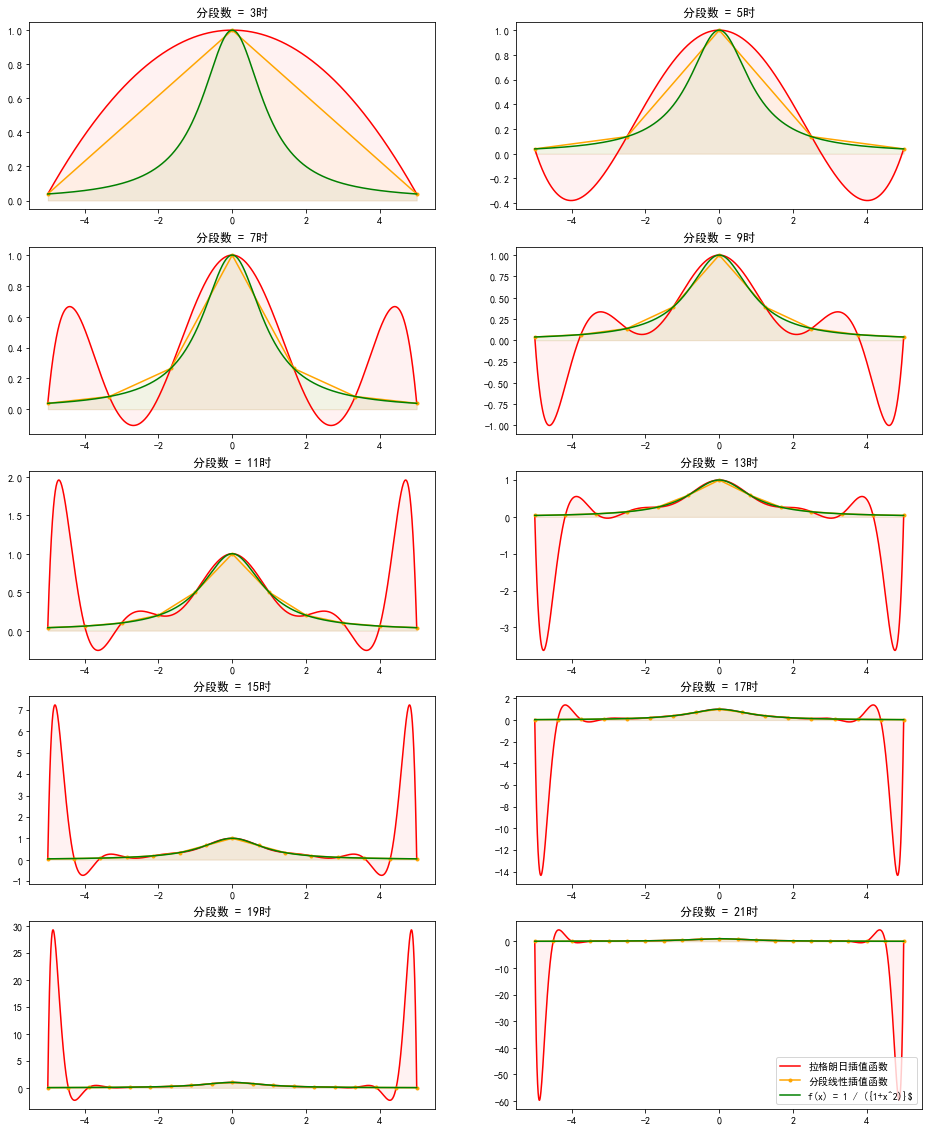

In [52]:
plt.figure(figsize=(16, 5 * 4))
for nid, n in enumerate(range(2, 21, 2)):
    x = np.linspace(-5., 5., n + 1)
    y = 1 / (1 + x * x)

    L = lagrange(x, y)
    f = np.poly1d(L)
    xs = np.linspace(-5., 5., 10000)
    ys_pred = f(xs)
    plt.subplot(5, 2, nid + 1)   
    plt.title('分段数 = %d时' % (n + 1))
    plt.plot(xs, ys_pred, label='拉格朗日插值函数', color='red')
    plt.fill_between(xs, ys_pred, color = "red", alpha = 0.05)
    plt.plot(x, y, marker='.', label='分段线性插值函数', color='orange')
    plt.fill_between(x, y, color = "orange", alpha = 0.05)
    plt.plot(xs, 1 / (1 + xs * xs), label='f(x) = 1 / ({1+x^2)}$', color='green')
    plt.fill_between(xs, 1 / (1 + xs * xs), color = "green", alpha = 0.05)
    _L = [l for l in L]
    for i, l in enumerate(_L):
        _L[i] = l / (n + 1 - i)
    _L.append(0)
    _f = np.poly1d(_L)
    res1 = _f(5) - _f(-5)
    
    res2 = 0
    for ki in range(1, len(x)):
        h = x[ki] - x[ki - 1]
        res2 += h / 2 * (y[ki - 1] + y[ki])
plt.legend(loc='lower right')
plt.savefig('fig21.pdf', bbox_inches='tight')

# 第5章

## 题目1

根据下列数据，使用幂曲线拟合，求解重力常量。

In [54]:
pd.options.display.float_format = None
columns=['时间$t_k$', '距离$d_k$']
df1 = pd.DataFrame([[0.200, 0.1960], [0.400, 0.7835], [0.600, 1.7630], [0.800, 3.1345], [1.000, 4.8975]], columns=columns)
df2 = pd.DataFrame([[0.200, 0.1965], [0.400, 0.7855], [0.600, 1.7675], [0.800, 3.1420], [1.000, 4.9095]], columns=columns)
display(df1, df2)

,时间$t_k$,距离$d_k$
0,0.2,0.1960
1,0.4,0.7835
2,0.6,1.7630
3,0.8,3.1345
4,1.0,4.8975


,时间$t_k$,距离$d_k$
0,0.2,0.1965
1,0.4,0.7855
2,0.6,1.7675
3,0.8,3.1420
4,1.0,4.9095


#### 时间-距离图线

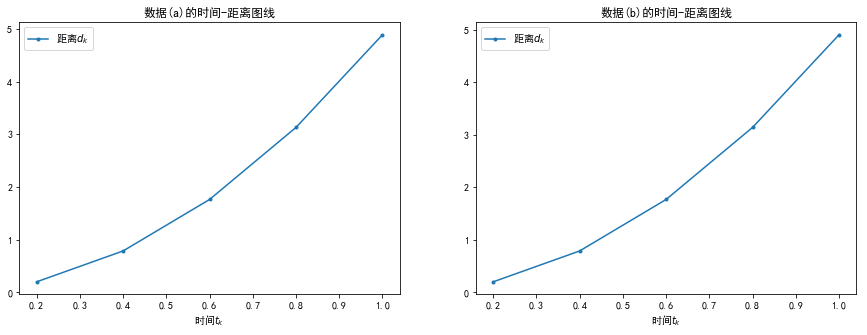

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df1.plot(x='时间$t_k$', y='距离$d_k$', ax=axes[0], title='数据(a)的时间-距离图线', marker='.')
df2.plot(x='时间$t_k$', y='距离$d_k$', ax=axes[1], title='数据(b)的时间-距离图线', marker='.')
plt.savefig('fig22.pdf', bbox_inches='tight')

#### 曲线拟合

设$\{(x_k, y_k)\}_{k=1}^N$有$N$个点，其中横坐标是确定的，最小二乘幂函数拟合曲线$y=Ax^M$的系数$A$为
$$A = \frac{\sum_{k=1}^{N}x_k^My_k}{\sum_{k=1}^{N}x_{k}^{2M}}$$

In [57]:
M = 2
# data (a)
x1 = df1['时间$t_k$'].values
y1 = df1['距离$d_k$'].values
g1 = sum(xi**M * yi for xi, yi in zip(x1, y1 * 2)) / sum(xi**(2*M) for xi in x1)
display(Math('g_1 = %.12f' % g1))

# data (b)
M = 2
x2 = df2['时间$t_k$'].values
y2 = df2['距离$d_k$'].values
g2 = sum(xi**M * yi for xi, yi in zip(x2, y2 * 2)) / sum(xi**(2*M) for xi in x2)
display(Math('g_2 = %.12f' % g2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 拟合曲线与原始数据比较

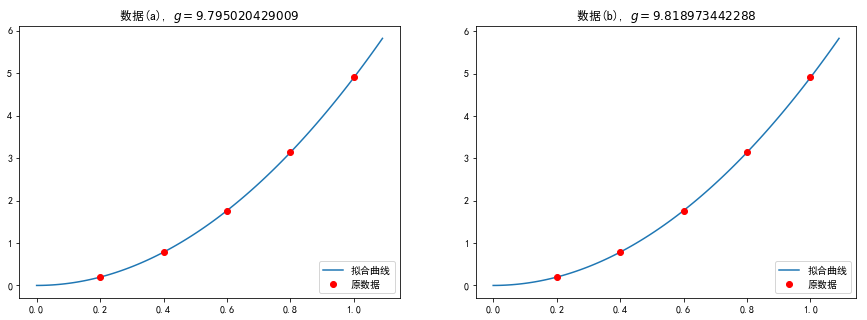

In [58]:
px = np.arange(0, 1.1, 0.01)
py1 = 0.5 * g1 * px**2
py2 = 0.5 * g2 * px**2
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('数据(a), $g = %.12f$' % g1)
plt.plot(px, py1, label='拟合曲线')
plt.plot(x1, y1, 'ro', label='原数据')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.title('数据(b), $g = %.12f$' % g2)
plt.plot(px, py2, label='拟合曲线')
plt.plot(x2, y2, 'ro', label='原数据')
plt.legend(loc='lower right')
plt.savefig('fig23.pdf', bbox_inches='tight')

## 题目2

编写程序，根据点$(0,1),(1,0),(2,0),(3,1),(4,2),(5,2),(6,1)$。求5种不同的三次样条插值，其中$S'(0)=-0.6,S'(6)=-1.8,S^{''}(0)=1,S^{''}(6)=-1$。在同一坐标系下，画出这5个三次样条插值和这些数据点。


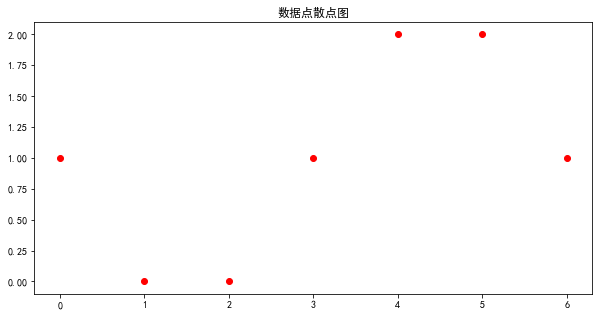

In [61]:
data = [(0,1),(1,0),(2,0),(3,1),(4,2),(5,2),(6,1)]
x, y = map(list, zip(*data))
plt.figure(figsize=(10, 5))
plt.title('数据点散点图')
plt.plot(x, y, 'ro')
plt.show()

#### 三次紧压样条

\begin{align}
m_0 &= \frac{3}{h_0}(d_0 - S^\prime(x_0)) - \frac{m_1}{2}\\
m_N &= \frac{3}{h_{N - 1}}(S^\prime(x_N) - d_{N - 1}) - \frac{m_{N - 1}}{2}
\end{align}


# 第6章

## 问题1

使用极限的微分求解下列函数在$x$处的导数近似值，精度为小数点后13位。（有必要改写程序中的$max1$的值和$h$的初始值）
$$f(x)=\tan{(\cos{(\frac{\sqrt{5}+\sin x}{1+x^2})})};\qquad x=\frac{1+\sqrt{5}}{3}$$

极限的微分求解

$$f^\prime(x) \approx \frac{f(x + 10^{-k}h) - f(x - 10^{-k}h)}{2(10^{-k}h)}, k=0,\cdots, n$$

In [62]:
x = sp.Symbol('x')
f = sp.tan(sp.cos((sp.sqrt(5) + sp.sin(x)) / (1 + x * x)))
f_eval = sp.lambdify(x, f)

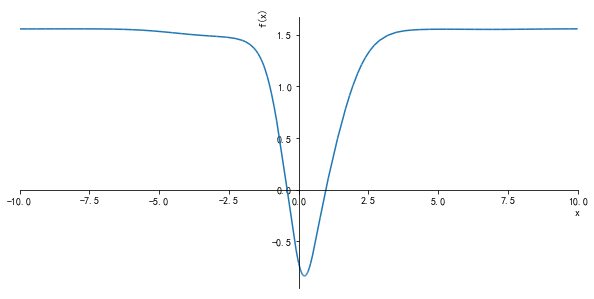

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
p = sp.plot(f, show=False)
move_sympyplot_to_axes(p, ax)
plt.savefig('fig24.pdf', bbox_inches='tight')

In [69]:
def diff_lim(f, x, tol, max_iter):
    h = 1
    D0 = (f(x + h) - f(x - h)) / (2 * h)
    for _ in range(max_iter):
        h /= 10.0
        D1 = (f(x + h) - f(x - h)) / (2 * h)
        if abs(D0 - D1) < tol:
            break
        D0 = D1
    return D0

In [70]:
print("%.10f" % diff_lim(f_eval, (1 + np.sqrt(5)) / 3.0, 10e-10, 100))

1.2285974239


In [71]:
df = sp.diff(f, x)
display(Math('f^\prime(x) = %s' % sp.latex(df)))

<IPython.core.display.Math object>

In [72]:
df_eval = sp.lambdify(x, df)
display(Math(r'f^\prime(\frac{1+\sqrt{5}}{3}) = %.12f' % df_eval((1 + np.sqrt(5)) / 3.0)))

<IPython.core.display.Math object>

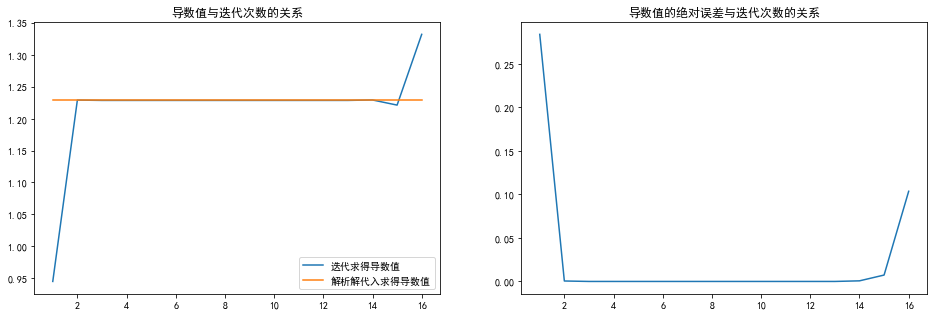

In [73]:
plt.figure(figsize=(16, 5))

def _diff_lim(f, x, max_iter):
    h = 1
    D0 = (f(x + h) - f(x - h)) / (2 * h)
    data = [(1, D0)]
    for i in range(max_iter):
        h /= 10.0
        D0 = (f(x + h) - f(x - h)) / (2 * h)
        data.append((i + 2, D0))
    return data
data = _diff_lim(f_eval, (1 + np.sqrt(5)) / 3.0, 15)
px, py = zip(*data)
px = np.array(px)
py = np.array(py)
plt.subplot(1, 2, 1)
plt.title('导数值与迭代次数的关系')
plt.plot(px, py, label='迭代求得导数值')
plt.plot(px, np.ones_like(px) * (df_eval((1 + np.sqrt(5)) / 3.0)), label= '解析解代入求得导数值')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.title('导数值的绝对误差与迭代次数的关系')
plt.plot(px, abs(df_eval((1 + np.sqrt(5)) / 3.0) - py))
plt.savefig('fig25.pdf', bbox_inches='tight')

# 第7章

## 题目1

使用组合辛普森公式求定积分，精确到小数点后11位
$$l=\int_a^b\sqrt{1+(f'(x)^2)}dx$$

1. $f(x)=x^3,0\leq x \leq1$
2. $f(x)=\sin x,0 \leq x \leq \pi/4$
3. $f(x)=e^{-x},0\leq x \leq 1$

#### 函数及其积分上下界定义

In [75]:
x = sp.Symbol('x')
f1 = x**3
a1, b1 = 0, 1
f2 = sp.sin(x)
a2, b2 = 0, np.pi / 4
f3 = sp.exp(-x)
a3, b3 = 0, 1
f1_eval = sp.lambdify(x, f1)
f2_eval = sp.lambdify(x, f2)
f3_eval = sp.lambdify(x, f3)

#### 组合辛普森公式

In [76]:
F1 = sp.integrate(f1)
F2 = sp.integrate(f2)
F3 = sp.integrate(f3)
F1_eval = sp.lambdify(x, F1)
display(Math('\int_{%s}^{%s}%s = [%s]_{%s}^{%s} = %f' % 
             (a1, b1, sp.latex(f1),
              sp.latex(F1), a1, b1, F1_eval(b1) - F1_eval(a1))))
F2_eval = sp.lambdify(x, F2)
display(Math('\int_{%s}^{%s}%s = [%s]_{%s}^{%s} = %f' % 
             (a2, sp.latex(sp.pi / 4), sp.latex(f2),
              sp.latex(F2), a2, sp.latex(sp.pi / 4), F2_eval(b2) - F2_eval(a2))))
F3_eval = sp.lambdify(x, F3)
display(Math('\int_{%s}^{%s}%s = [%s]_{%s}^{%s} = %f' % 
             (a3, b3, sp.latex(f3),
              sp.latex(F3), a3, b3, F3_eval(b3) - F3_eval(a3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
def simpson(f, a, b, M):
    h = (b - a) / (2 * M)
    s = 0
    for k in range(1, M + 1):
        s += f(a + (2 * k - 2) * h) + 4 * f(a + (2 * k - 1) * h) + f(a + 2 * k * h)
    s *= h / 3
    return s

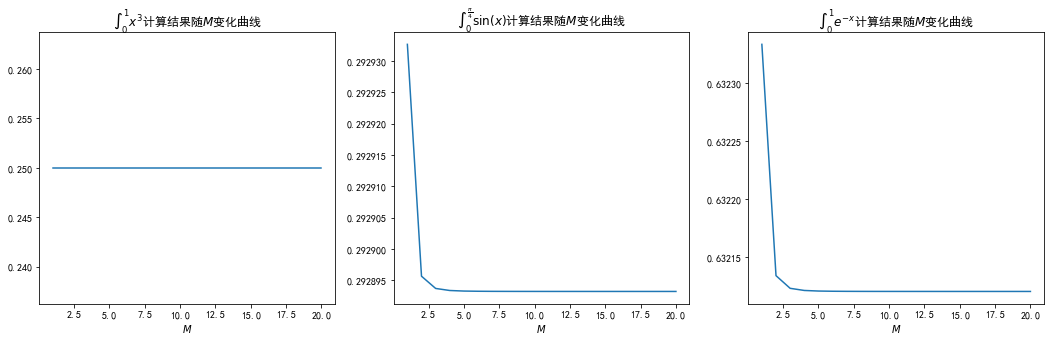

In [78]:
MAX_M = 20
m = np.arange(1, MAX_M + 1)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title('$\int_{%s}^{%s}%s$计算结果随$M$变化曲线' % (a1, b1, sp.latex(f1)))
plt.xlabel('$M$')
int1 = np.array([simpson(sp.lambdify(x, f1), a1, b1, mi) for mi in m])
plt.plot(m, int1)

plt.subplot(1, 3, 2)
plt.xlabel('$M$')
plt.title('$\int_{%s}^{%s}%s$计算结果随$M$变化曲线' % (a2, sp.latex(sp.pi / 4), sp.latex(f2)))
int2 = np.array([simpson(sp.lambdify(x, f2), a2, b2, mi) for mi in m])
plt.plot(m, int2)

plt.subplot(1, 3, 3)
plt.xlabel('$M$')
plt.title('$\int_{%s}^{%s}%s$计算结果随$M$变化曲线' % (a3, b3, sp.latex(f3)))
int3 = np.array([simpson(sp.lambdify(x, f3), a3, b3, mi) for mi in m])
plt.plot(m, int3)

plt.savefig('fig26.pdf', bbox_inches='tight')

In [79]:
int1 = simpson(sp.lambdify(x, f1), a1, b1, 10)
display(Math('\int_{%s}^{%s}{%s} = %f' % 
             (sp.latex(a1), sp.latex(b1), sp.latex(f1), int1)))
int2 = simpson(sp.lambdify(x, f2), a2, b2, 10)
display(Math('\int_{%s}^{%s}{%s} = %f' % 
             (sp.latex(a2), sp.latex(sp.pi / 4), sp.latex(f2), int2)))
int3 = simpson(sp.lambdify(x, f3), a3, b3, 10)
display(Math('\int_{%s}^{%s}{%s} = %f' % 
             (sp.latex(a3), sp.latex(b3), sp.latex(f3), int3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 积分解析解

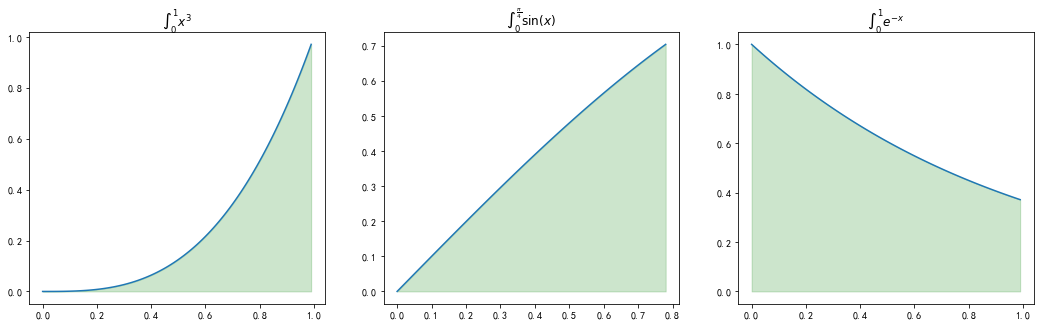

In [80]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ps1 = np.arange(a1, b1, 0.01)
plt.plot(ps1, f1_eval(ps1))
plt.fill_between(ps1, f1_eval(ps1), color = "green", alpha = 0.2)
plt.title('$\int_{%s}^{%s}%s$' % (a1, b1, sp.latex(f1)))

plt.subplot(1, 3, 2)
ps2 = np.arange(a2, b2, 0.01)
plt.plot(ps2, f2_eval(ps2))
plt.fill_between(ps2, f2_eval(ps2), color = "green", alpha = 0.2)
plt.title('$\int_{%s}^{%s}%s$' % (a2, sp.latex(sp.pi / 4), sp.latex(f2)))

plt.subplot(1, 3, 3)
ps3 = np.arange(a3, b3, 0.01)
plt.plot(ps3, f3_eval(ps3))
plt.fill_between(ps3, f3_eval(ps3), color = "green", alpha = 0.2)
plt.title('$\int_{%s}^{%s}%s$' % (a3, b3, sp.latex(f3)))

plt.savefig('fig27.pdf', bbox_inches='tight')

## 题目2

修改组合梯形公式，使之可以求只有若干个点函数值的已知函数的积分。将程序修改为求区间$[a,b]$上过$M$个给定点的函数$f(x)$的积分逼近。注意节点不需要等距，利用该程序求过点${\{(\sqrt{k^2+1},k^{1/3})\}}_{k=0}^{13}$的函数的积分逼近。

21.84106920647963


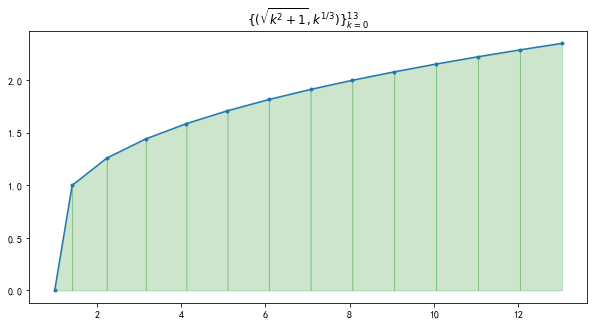

In [81]:
k = np.arange(14)
x = np.sqrt(k * k + 1)
y = k ** (1 / 3)
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='.')
plt.title('${\{(\sqrt{k^2+1},k^{1/3})\}}_{k=0}^{13}$')
res = 0
for ki in range(1, 14):
    h = x[ki] - x[ki - 1]
    res += h / 2 * (y[ki - 1] + y[ki])
    plt.fill_between([x[ki], x[ki - 1]], [y[ki], y[ki - 1]], color = "green", alpha = 0.2)
print(res)
plt.savefig('fig28.pdf', bbox_inches='tight')

# 第9章

## 题目1

流行病的数学模型描述如下：设有$L$个成员的构成的群落，其中有$P$个感染个体，$Q$为未感染个体。令$y(t)$表示时刻$t$感染个体的数量。对于温和的疾病，如普通感冒，每个个体保持存活，流行病从感染者传播到未感染者。由于两组间有$PQ$种可能的接触，$y(t)$的变化率正比于$PQ$。故该问题可以描述为初值问题：
$$y'=ky(L-y)\qquad y(0)=y_0$$

### 题目1.1

用$L=25000,k=0.00003,h=0.2$和初值条件$y(0)=250$,编写程序求解$[0,60]$上的欧拉近似解。

In [84]:
h = 0.2
M = int(60 / h)
def f(y):
    return 0.00003 * y * (25000 - y)
t = np.linspace(0, 60, M)
y = np.zeros(M)
y[0] = 250
for k in range(M - 1):
    y[k + 1] = y[k] + h * f(y[k])
display(pd.DataFrame(list(zip(t, y))[:10], columns=['$t$', '$y$']))
display(Math(r'\cdots'))

,$t$,$y$
0,0.000000,250.000000
1,0.200669,287.125000
2,0.401338,329.699105
3,0.602007,378.501762
4,0.802676,434.417445
5,1.003344,498.447751
6,1.204013,571.724212
7,1.404682,655.521633
8,1.605351,751.271626
9,1.806020,860.575916


<IPython.core.display.Math object>

In [2]:
from __future__ import print_function, division
import numpy as np

In [24]:
h = 0.001
M = int(1.5/ h)
def f(y):
    return 1+y**2
t = np.linspace(0,1.5, M)
y = np.zeros(M)
y[0] = 0
for k in range(M - 1):
    y[k + 1] = y[k] + h * f(y[k])
display(pd.DataFrame(list(zip(t, y))[:10], columns=['$t$', '$y$']))
display(Math(r'\cdots'))

,$t$,$y$
0,0.000000,0.000
1,0.001001,0.001
2,0.002001,0.002
3,0.003002,0.003
4,0.004003,0.004
5,0.005003,0.005
6,0.006004,0.006
7,0.007005,0.007
8,0.008005,0.008
9,0.009006,0.009


<IPython.core.display.Math object>

In [21]:
np.tan( 1.500000 	)

14.101419947171719

### 题目1.2

画出题目1.1中的近似解。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 27431 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 25289 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2001: RuntimeWarning: Glyph 27431 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\s

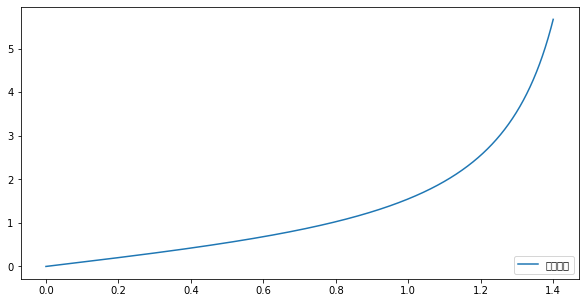

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='欧拉方法')
plt.legend(loc='lower right')
plt.savefig('fig29.pdf', bbox_inches='tight')

### 题目1.3

通过求题目1.1中欧拉方法的纵坐标平均值来估计平均感染个体数目。

In [77]:
np.mean(y)

### 题目1.4

通过使用曲线拟合题目1.1中的数据，并使用积分中值定理，估计平均感染个体的数目。

$f(x) = \frac{L}{1 + e^{ax + b}}$

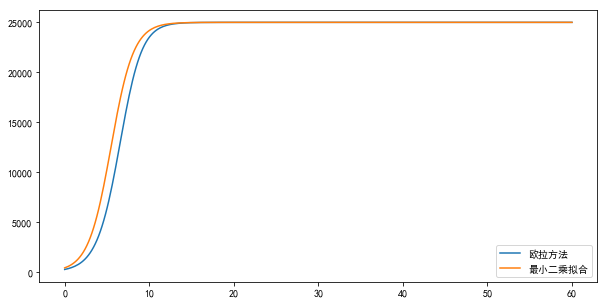

In [86]:
p = np.poly1d(np.polyfit(t, np.log(25000 - y) - np.log(y), 1))
_y = 25000.0 / (1 + np.exp(p(t)))

plt.figure(figsize=(10, 5))
plt.plot(t, y, label='欧拉方法')
plt.plot(t, _y, label='最小二乘拟合')
plt.legend(loc='lower right')
plt.savefig('fig30.pdf', bbox_inches='tight')

In [79]:
integrate.quad(lambda x: 25000.0 / (1 + np.exp(p(x))), 0, 60)[0] / 60

## 问题2

考虑一阶积分-常微分方程(intergro-ordinary differential equation)$$y'=1.3y-0.25y^2-0.0001y\int_0^ty(\tau)d\tau$$

### 问题2.1

在区间$[0,20]$上，用欧拉方法和$h=0.2,y(0)=250$以及梯形公式求方程的近似解。


In [98]:
h = 0.2
M = int(20 / h)
x = np.linspace(0, 20, M)
y = np.zeros(M)
t = np.zeros(M)
y[0] = 300
t[0] = 0
for k in range(M - 1):
    if k > 0:
        t[k] = t[k - 1] + h * (y[k - 1] + y[k]) / 2
    y[k + 1] = y[k] + h * (1.3 * y[k] - 0.25 * y[k] * y[k] - 0.0001 * y[k] * t[k])
display(pd.DataFrame(list(zip(x, y))[:10], columns=['$x$', '$y$']))
display(Math(r'\cdots'))

C:\Users\cuichen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,$x$,$y$
0,0.000000,3.000000e+02
1,0.202020,-4.122000e+03
2,0.404040,-8.547694e+05
3,0.606061,-3.653409e+10
4,0.808081,-6.673966e+19
5,1.010101,-2.227180e+38
6,1.212121,-2.480265e+75
7,1.414141,-3.075980e+149
8,1.616162,-4.731015e+297
9,1.818182,-inf


<IPython.core.display.Math object>

C:\Users\cuichen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\cuichen\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\Users\cuichen\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars


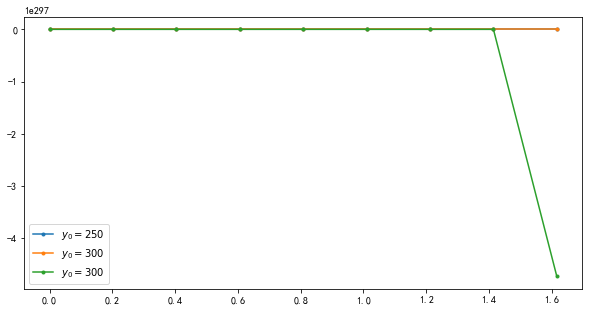

In [105]:
plt.figure(figsize=(10, 5))

h = 0.2
M = int(20 / h)
x = np.linspace(0, 20, M)
y = np.zeros(M)
t = np.zeros(M)
y[0] = 250
t[0] = 0
for k in range(M - 1):
    if k > 0:
        t[k] = t[k - 1] + h * (y[k - 1] + y[k]) / 2
    y[k + 1] = y[k] + h * (1.3 * y[k] - 0.25 * y[k] * y[k] - 0.0001 * y[k] * t[k])

plt.plot(x, y, label='$y_0=250$', marker='.')    

h = 0.2
M = int(20 / h)
x = np.linspace(0, 20, M)
y = np.zeros(M)
t = np.zeros(M)
y[0] = 200
t[0] = 0
for k in range(M - 1):
    if k > 0:
        t[k] = t[k - 1] + h * (y[k - 1] + y[k]) / 2
    y[k + 1] = y[k] + h * (1.3 * y[k] - 0.25 * y[k] * y[k] - 0.0001 * y[k] * t[k])

plt.plot(x, y, label='$y_0=300$', marker='.')
    
h = 0.2
M = int(20 / h)
x = np.linspace(0, 20, M)
y = np.zeros(M)
t = np.zeros(M)
y[0] = 300
t[0] = 0
for k in range(M - 1):
    if k > 0:
        t[k] = t[k - 1] + h * (y[k - 1] + y[k]) / 2
    y[k + 1] = y[k] + h * (1.3 * y[k] - 0.25 * y[k] * y[k] - 0.0001 * y[k] * t[k])

plt.plot(x, y, label='$y_0=300$', marker='.')

plt.legend(loc='lower left')
plt.savefig('fig33.pdf', bbox_inches='tight')

### 问题2.2
用初值$y(0)=200$和$y(0)=300$重复计算问题2.1的值。

### 问题2.3

在同一坐标系下画出问题2.1和问题2.3的近似解。

## 问题3

使用休恩方法求解微分方程
$$y'=3y+3t\qquad y(0)=1\qquad y(t)=\frac{4}{3}e^{3t}-t-\frac{1}{3}$$
(a) 令$h=0.1$,使程序执行20步，然后令$h=0.05$，使程序执行40步<br />
(b) 比较(a)中两个近似解与精确解$y(2)$。<br />
(c) 当h减半时，(a)中的最终全局误差是否和预期相符？<br />
(d) 将两个近似解和精确解画在同一坐标系中。<br />

In [119]:
def heun(f, a, b, ya, M):
    h = (b - a) / M
    T = np.linspace(a, b, M)
    Y = np.zeros(M)
    Y[0] = ya
    for j in range(M - 1):
        k1 = f(T[j], Y[j])
        k2 = f(T[j + 1], Y[j] + h * k1)
        Y[j + 1] = Y[j] + (h / 2) * (k1 + k2)
    return T, Y
def f(t, y):
    return 3 * y + 3 * t
T, Y = heun(f, 0, 2, 1, 20)
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3* T) - T - 1/3
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T, Y = heun(f, 0, 2, 1, 40)
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T = np.linspace(0, 2, 40)
Y = 4/3 * np.exp(3* T) - T - 1/3
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

,$x$,$y$
0,0.000000,1.000000
1,0.105263,1.360789
2,0.210526,1.882367
3,0.315789,2.620205
4,0.421053,3.648912
5,0.526316,5.068840
6,0.631579,7.014958
7,0.736842,9.668802
8,0.842105,13.274539
9,0.947368,18.160571


,$x$,$y$
0,0.000000,1.000000
1,0.105263,1.389859
2,0.210526,1.963577
3,0.315789,2.789429
4,0.421053,3.961043
5,0.526316,5.606815
6,0.631579,7.902818
7,0.736842,11.090512
8,0.842105,15.501017
9,0.947368,21.588414


,$x$,$y$
0,0.000000,1.000000
1,0.051282,1.165096
2,0.102564,1.365083
3,0.153846,1.605588
4,0.205128,1.893142
5,0.256410,2.235335
6,0.307692,2.640975
7,0.358974,3.120293
8,0.410256,3.685172
9,0.461538,4.349405


,$x$,$y$
0,0.000000,1.000000
1,0.051282,1.170467
2,0.102564,1.377812
3,0.153846,1.628171
4,0.205128,1.928696
5,0.256410,2.287730
6,0.307692,2.715005
7,0.358974,3.221870
8,0.410256,3.821560
9,0.461538,4.529515


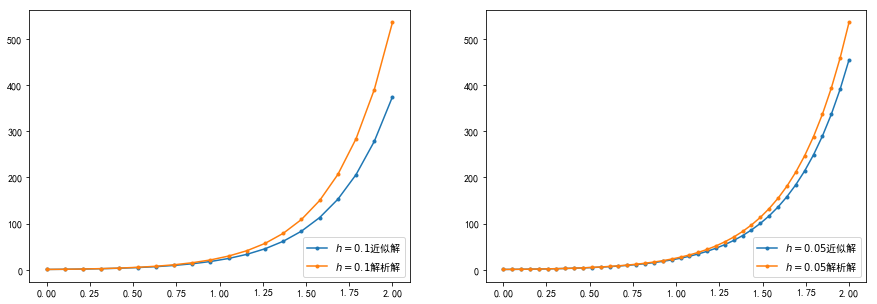

In [122]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
T, Y = heun(f, 0, 2, 1, 20)
plt.plot(T, Y, label='$h=0.1$近似解', marker='.')
T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.1$解析解', marker='.')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
T, Y = heun(f, 0, 2, 1, 40)
plt.plot(T, Y, label='$h=0.05$近似解', marker='.')
T = np.linspace(0, 2, 40)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.05$解析解', marker='.')
plt.legend(loc='lower right')
plt.savefig('fig34.pdf', bbox_inches='tight')

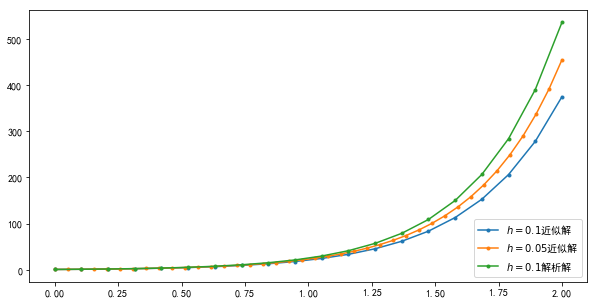

In [124]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
T, Y = heun(f, 0, 2, 1, 20)
plt.plot(T, Y, label='$h=0.1$近似解', marker='.')
T, Y = heun(f, 0, 2, 1, 40)
plt.plot(T, Y, label='$h=0.05$近似解', marker='.')
T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.1$解析解', marker='.')
plt.legend(loc='lower right')
plt.savefig('fig35.pdf', bbox_inches='tight')

## 问题4

使用$N=4$的龙格-库塔方法求解微分方程
$$y'=3y+3t\qquad y(0)=1\qquad y(t)=\frac{4}{3}e^{3t}-t-\frac{1}{3}$$
(a) 令$h=0.1$,使程序执行20步，然后令$h=0.05$，使程序执行40步<br />
(b) 比较(a)中两个近似解与精确解$y(2)$。<br />
(c) 当h减半时，(a)中的最终全局误差是否和预期相符？<br />
(d) 将两个近似解和精确解画在同一坐标系中。<br />

In [125]:
def rk4(f, a, b, ya, M):
    h = (b - a) / M
    T = np.linspace(a, b, M)
    Y = np.zeros(M)
    Y[0] = ya
    for j in range(M - 1):
        k1 = h * f(T[j], Y[j])
        k2 = h * f(T[j] + h / 2, Y[j] + k1 / 2)
        k3 = h * f(T[j] + h / 2, Y[j] + k2 / 2)
        k4 = h * f(T[j] + h, Y[j] + k3)
        Y[j + 1] = Y[j] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return T, Y

In [126]:
def f(t, y):
    return 3 * y + 3 * t

T, Y = rk4(f, 0, 2, 1, 20)
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3 * T) - T - 1/3
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T, Y = rk4(f, 0, 2, 1, 40)
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

T = np.linspace(0, 2, 40)
Y = 4/3 * np.exp(3 * T) - T - 1/3
display(pd.DataFrame(list(zip(T, Y))[:10], columns=['$x$', '$y$']))

,$x$,$y$
0,0.000000,1.000000
1,0.105263,1.366450
2,0.210526,1.897923
3,0.315789,2.652150
4,0.421053,3.707059
5,0.526316,5.167840
6,0.631579,7.176482
7,0.736842,9.924647
8,0.842105,13.671048
9,0.947368,18.764905


,$x$,$y$
0,0.000000,1.000000
1,0.105263,1.389859
2,0.210526,1.963577
3,0.315789,2.789429
4,0.421053,3.961043
5,0.526316,5.606815
6,0.631579,7.902818
7,0.736842,11.090512
8,0.842105,15.501017
9,0.947368,21.588414


,$x$,$y$
0,0.000000,1.000000
1,0.051282,1.165778
2,0.102564,1.366684
3,0.153846,1.608402
4,0.205128,1.897538
5,0.256410,2.241764
6,0.307692,2.649997
7,0.358974,3.132595
8,0.410256,3.701593
9,0.461538,4.370973


,$x$,$y$
0,0.000000,1.000000
1,0.051282,1.170467
2,0.102564,1.377812
3,0.153846,1.628171
4,0.205128,1.928696
5,0.256410,2.287730
6,0.307692,2.715005
7,0.358974,3.221870
8,0.410256,3.821560
9,0.461538,4.529515


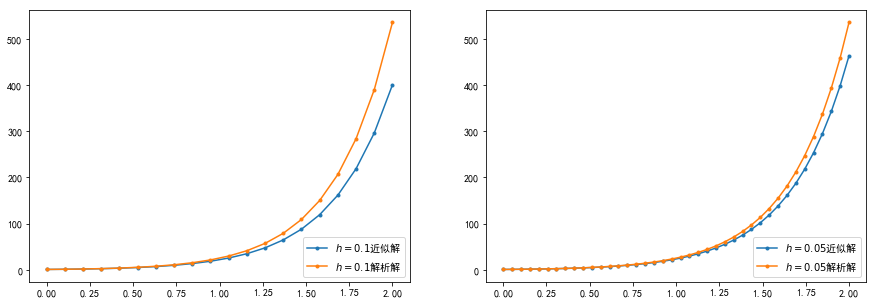

In [128]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
T, Y = rk4(f, 0, 2, 1, 20)
plt.plot(T, Y, label='$h=0.1$近似解', marker='.')
T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.1$解析解', marker='.')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
T, Y = rk4(f, 0, 2, 1, 40)
plt.plot(T, Y, label='$h=0.05$近似解', marker='.')
T = np.linspace(0, 2, 40)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.05$解析解', marker='.')
plt.legend(loc='lower right')
plt.savefig('fig36.pdf', bbox_inches='tight')

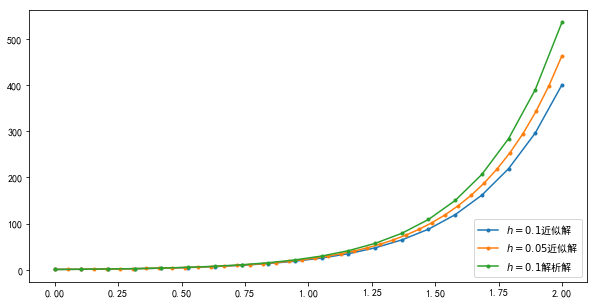

In [129]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
T, Y = rk4(f, 0, 2, 1, 20)
plt.plot(T, Y, label='$h=0.1$近似解', marker='.')
T, Y = rk4(f, 0, 2, 1, 40)
plt.plot(T, Y, label='$h=0.05$近似解', marker='.')
T = np.linspace(0, 2, 20)
Y = 4/3 * np.exp(3* T) - T - 1/3
plt.plot(T, Y, label='$h=0.1$解析解', marker='.')
plt.legend(loc='lower right')
plt.savefig('fig37.pdf', bbox_inches='tight')

In [131]:
def pow2(A, X, step, eps):
    l = 0
    cnt = 0
    err = 1
    while err > eps and cnt < step:
        cnt += 1
        Y = A * X
        C[cnt] = max(abs(Y))
        dc = abs(l - C[cnt])
        Y = (1 / C[cnt]) * Y
        dv = norm(X - Y)
        err = max(dc, dv)
        X = Y
        l = C[cnt]
    V = X
    return C, l, V

In [132]:
def sym_pow(A, X, step, eps):
    cnt = 0
    err = 1
    X = X / norm(X, 2)
    while err > eps and cnt < step:
        cnt += 1
        Y = A * X
        C[cnt] = X * Y
        dc = norm(Y, 2)
        err = norm(X - Y / norm(Y, 2), 2)
        X = Y / norm(Y, 2)
    V = X
    l = u
    return C, l, V

In [133]:
def inv_pow(A, X, alpha, step, eps):
    n = A.size()
    A -= alpha * np.identity(n)
    l = 0
    cnt = 0
    err = 1
    while err > eps and cnt < step:
        cnt += 1
        Y = A \ X
        C[cnt] = max(Y)
        dc = abs(l - C[cnt])
        Y = (1 / C[cnt]) * Y
        dv = norm(X - Y)
        err = max(dc, dv)
        X = Y
        l = C[cnt]
    l = alpha + 1 / C[cnt]
    V = X
    return C, l, V

SyntaxError: unexpected character after line continuation character (<ipython-input-133-dedd296ac56c>, line 9)